# Best Next Offer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from zipfile import ZipFile
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
# specifying the zip file name
file_name = "/Users/jaangulor/Library/CloudStorage/OneDrive-UniversidaddelosAndes/Ciencia de datos aplicada/Proyecto Final/Proyecto - Ciencia de datos/Bases de datos/ClientesBAC_Activos.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
2_ClientesBAC_Activos.txt                      2022-09-17 12:46:44    145071882
Extracting all the files now...
Done!


In [3]:
df = pd.read_csv('2_ClientesBAC_Activos.txt', sep=';')

In [4]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (500000, 49)
Nombre columnas: Index(['FechaCorte', 'SegmentoDesc', 'SBAN', 'NumeroDoctoIdentificacion',
       'TipoDoctoIdentificacionCD', 'SexoDesc', 'Edad', 'EstadoCivilDesc',
       'ProfesionDesc', 'ClienteFallecido', 'indClienteEsEmpleado',
       'FechaVinculacionBAC', 'EstadoClienteDesc', 'TipoClienteDesc',
       'ValorActivos', 'ValorEgresos', 'ValorIngresos', 'ValorOtrosingresos',
       'ValorPatrimonio', 'TotalPasivos', 'NumCreditos', 'SaldoCreditos',
       'SaldoCarteraVencida', 'NumeroTC', 'SaldoTC', 'SaldoTCVencido',
       'NumeroSobregisrosUso', 'SaldoSobregirosUso', 'SaldoSobregirosVencidos',
       'NumeroCuentasAhorroActivas', 'SaldoCuentasAhorroActivas',
       'NumeroCuentasAhorroInactivas', 'SaldoCuentasAhorroInactivas',
       'NumeroCuentasCorrienteActivas', 'SaldoCuentasCorrienteActivas',
       'NumeroCuentascorrienteInactivas', 'SaldoCuentascorrienteInactivas',
       'NumeroCDT', 'SaldoCDT', 'NumeroCDAT', 'SaldoCDAT', 'SaldoT

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 1 to 500000
Data columns (total 49 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   FechaCorte                       500000 non-null  object 
 1   SegmentoDesc                     500000 non-null  object 
 2   SBAN                             500000 non-null  int64  
 3   NumeroDoctoIdentificacion        500000 non-null  object 
 4   TipoDoctoIdentificacionCD        500000 non-null  object 
 5   SexoDesc                         490736 non-null  object 
 6   Edad                             490736 non-null  float64
 7   EstadoCivilDesc                  488807 non-null  object 
 8   ProfesionDesc                    488862 non-null  object 
 9   ClienteFallecido                 500000 non-null  object 
 10  indClienteEsEmpleado             492998 non-null  object 
 11  FechaVinculacionBAC              499992 non-null  object 
 12  Es

In [6]:
datos=df.copy()
datos.head(10)

,FechaCorte,SegmentoDesc,SBAN,NumeroDoctoIdentificacion,TipoDoctoIdentificacionCD,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,ClienteFallecido,...,NumeroCDAT,SaldoCDAT,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida
1,2020-09-30,AGROPECUARIA,2104,25297-33112104,CC,MASCULINO,118.0,NaN,NaN,S/D,...,0,0.0,0.0,0,2,5016932.75,0,0,0,0
2,2020-09-30,AGROPECUARIA,70,219582-780370,CC,MASCULINO,36.0,SOLTERO,SIN PROFESION,S/D,...,0,0.0,0.0,0,2,15068450.16,0,0,0,0
3,2020-09-30,AGROPECUARIA,4840,248440-12114840,CC,MASCULINO,41.0,CASADO,SIN PROFESION,S/D,...,0,0.0,5999542.0,1,1,4526.00,0,0,0,0
4,2020-09-30,AGROPECUARIA,6048,516132-22586048,CC,MASCULINO,43.0,SOLTERO,SIN PROFESION,S/D,...,0,0.0,5674272.0,2,1,10135.00,0,0,0,0
5,2020-09-30,AGROPECUARIA,2180,718406-41302180,CC,FEMENINO,43.0,SOLTERO,SIN PROFESION,S/D,...,0,0.0,0.0,0,2,3871.70,0,0,0,0
6,2020-09-30,AGROPECUARIA,2106,18386-44382106,CC,MASCULINO,57.0,SOLTERO,SIN PROFESION,S/D,...,0,0.0,4810806.0,1,2,11481.00,0,0,0,0
7,2020-09-30,AGROPECUARIA,1516,188190-32121516,CC,FEMENINO,44.0,SOLTERO,SIN PROFESION,S/D,...,0,0.0,0.0,0,1,77243.00,0,0,0,0
8,2020-09-30,AGROPECUARIA,820,371740-4897820,CC,FEMENINO,43.0,SOLTERO,ZOOTECNISTA,S/D,...,0,0.0,0.0,0,1,16336.00,0,0,0,0
9,2020-09-30,AGROPECUARIA,2118,771839-30472118,CC,FEMENINO,36.0,SOLTERO,AGRICULTOR,S/D,...,0,0.0,3399171.0,2,2,115.00,0,0,0,0
10,2020-09-30,AGROPECUARIA,1548,701311-20691548,CC,FEMENINO,54.0,SOLTERO,SIN PROFESION,S/D,...,0,0.0,15000000.0,1,2,10004033.62,0,0,0,0


In [7]:
datos[datos.duplicated() == True]

,FechaCorte,SegmentoDesc,SBAN,NumeroDoctoIdentificacion,TipoDoctoIdentificacionCD,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,ClienteFallecido,...,NumeroCDAT,SaldoCDAT,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida


In [8]:
#Eliminamos variables que no son relevantes
datos_clean=datos.drop(['FechaCorte','SBAN','FechaVinculacionBAC','EstadoClienteDesc'],axis=1)

In [9]:
datos_clean.isnull().sum()

SegmentoDesc                            0
NumeroDoctoIdentificacion               0
TipoDoctoIdentificacionCD               0
SexoDesc                             9264
Edad                                 9264
EstadoCivilDesc                     11193
ProfesionDesc                       11138
ClienteFallecido                        0
indClienteEsEmpleado                 7002
TipoClienteDesc                         0
ValorActivos                         1069
ValorEgresos                         1057
ValorIngresos                        1062
ValorOtrosingresos                 201256
ValorPatrimonio                      1069
TotalPasivos                         1097
NumCreditos                             0
SaldoCreditos                           0
SaldoCarteraVencida                     0
NumeroTC                                0
SaldoTC                                 0
SaldoTCVencido                          0
NumeroSobregisrosUso                    0
SaldoSobregirosUso                

<AxesSubplot:>

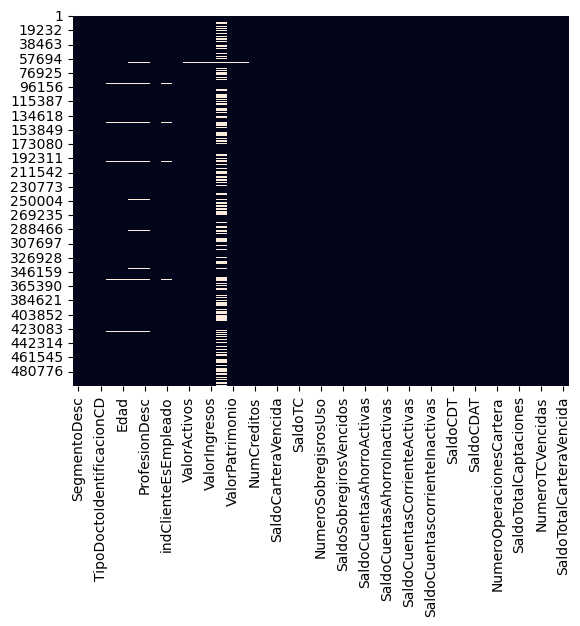

In [10]:
sns.heatmap(datos_clean.isnull(), cbar=False)

In [11]:
datos_clean=datos_clean.dropna(subset = ['SexoDesc','Edad','EstadoCivilDesc','ProfesionDesc','indClienteEsEmpleado'])

In [12]:
datos_clean = datos_clean.fillna(0)

In [13]:
datos_numericos=datos_clean.select_dtypes(include=['float64','int64'])
datos_numericos.describe()

,Edad,ValorActivos,ValorEgresos,ValorIngresos,ValorOtrosingresos,ValorPatrimonio,TotalPasivos,NumCreditos,SaldoCreditos,SaldoCarteraVencida,...,NumeroCDAT,SaldoCDAT,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida
count,488805.000000,4.888050e+05,4.888050e+05,4.888050e+05,4.888050e+05,4.888050e+05,4.888050e+05,488805.000000,4.888050e+05,4.888050e+05,...,488805.000000,4.888050e+05,4.888050e+05,488805.000000,488805.000000,4.888050e+05,488805.000000,488805.0,488805.000000,488805.0
mean,49.455161,1.258345e+08,3.384810e+06,5.185161e+06,2.049556e+07,1.091055e+08,1.675780e+07,0.964200,8.407634e+06,1.866686e+05,...,0.000604,8.741108e+03,8.617226e+06,1.108501,1.244687,1.919260e+06,0.078950,0.0,0.079042,0.0
std,14.202674,5.977381e+09,3.700419e+08,1.185862e+08,1.430321e+10,6.108987e+09,1.294780e+09,0.888365,2.336854e+07,2.426820e+06,...,0.035001,1.117481e+06,2.363910e+07,1.047141,0.695394,1.308219e+07,0.330599,0.0,0.331124,0.0
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.980000e+11,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0
25%,39.000000,4.430000e+07,4.450000e+05,1.950000e+06,0.000000e+00,3.933500e+07,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.038000e+03,0.000000,0.0,0.000000,0.0
50%,49.000000,6.100000e+07,6.000000e+05,2.600000e+06,0.000000e+00,5.515000e+07,4.000000e+06,1.000000,4.199883e+06,0.000000e+00,...,0.000000,0.000000e+00,4.390164e+06,1.000000,1.000000,9.948000e+03,0.000000,0.0,0.000000,0.0
75%,60.000000,8.500000e+07,1.000000e+06,3.200000e+06,0.000000e+00,7.667000e+07,1.050000e+07,1.000000,1.000000e+07,0.000000e+00,...,0.000000,0.000000e+00,1.010454e+07,2.000000,2.000000,1.070970e+05,0.000000,0.0,0.000000,0.0
max,120.000000,3.335000e+12,2.523796e+11,6.625025e+10,1.000003e+13,3.334826e+12,9.000000e+11,25.000000,3.037870e+09,3.993156e+08,...,10.000000,5.550000e+08,3.037870e+09,25.000000,26.000000,2.264939e+09,11.000000,0.0,11.000000,0.0


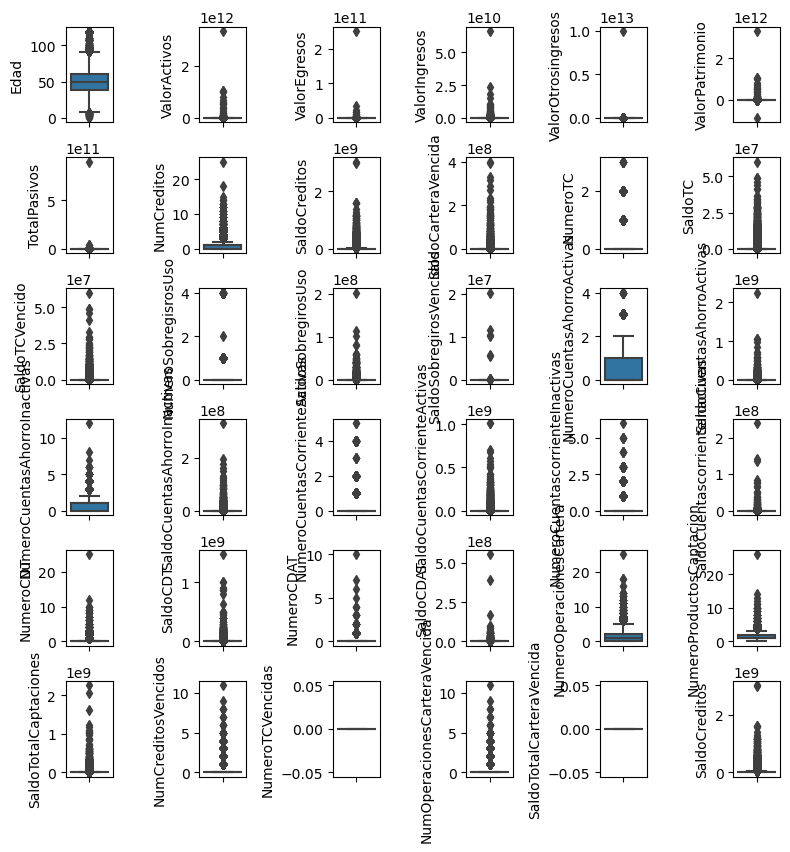

In [14]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 8))

subplot(6,6,1)
sns.boxplot(y = datos_clean['Edad']) 

subplot(6,6,2)
sns.boxplot(y = datos_clean['ValorActivos'])

subplot(6,6,3)
sns.boxplot(y = datos_clean['ValorEgresos'])

subplot(6,6,4)
sns.boxplot(y = datos_clean['ValorIngresos'])

subplot(6,6,5)
sns.boxplot(y = datos_clean['ValorOtrosingresos'])

subplot(6,6,6)
sns.boxplot(y = datos_clean['ValorPatrimonio'])

subplot(6,6,7)
sns.boxplot(y = datos_clean['TotalPasivos'])

subplot(6,6,8)
sns.boxplot(y = datos_clean['NumCreditos'])

subplot(6,6,9)
sns.boxplot(y = datos_clean['SaldoCreditos'])

subplot(6,6,10)
sns.boxplot(y = datos_clean['SaldoCarteraVencida']) 

subplot(6,6,11)
sns.boxplot(y = datos_clean['NumeroTC']) 

subplot(6,6,12)
sns.boxplot(y = datos_clean['SaldoTC']) 

subplot(6,6,13)
sns.boxplot(y = datos_clean['SaldoTCVencido']) 

subplot(6,6,14)
sns.boxplot(y = datos_clean['NumeroSobregisrosUso']) 

subplot(6,6,15)
sns.boxplot(y = datos_clean['SaldoSobregirosUso']) 

subplot(6,6,16)
sns.boxplot(y = datos_clean['SaldoSobregirosVencidos']) 

subplot(6,6,17)
sns.boxplot(y = datos_clean['NumeroCuentasAhorroActivas']) 

subplot(6,6,18)
sns.boxplot(y = datos_clean['SaldoCuentasAhorroActivas']) 

subplot(6,6,19)
sns.boxplot(y = datos_clean['NumeroCuentasAhorroInactivas']) 

subplot(6,6,20)
sns.boxplot(y = datos_clean['SaldoCuentasAhorroInactivas']) 

subplot(6,6,21)
sns.boxplot(y = datos_clean['NumeroCuentasCorrienteActivas']) 

subplot(6,6,22)
sns.boxplot(y = datos_clean['SaldoCuentasCorrienteActivas']) 

subplot(6,6,23)
sns.boxplot(y = datos_clean['NumeroCuentascorrienteInactivas']) 

subplot(6,6,24)
sns.boxplot(y = datos_clean['SaldoCuentascorrienteInactivas']) 

subplot(6,6,25)
sns.boxplot(y = datos_clean['NumeroCDT']) 

subplot(6,6,26)
sns.boxplot(y = datos_clean['SaldoCDT']) 

subplot(6,6,27)
sns.boxplot(y = datos_clean['NumeroCDAT']) 

subplot(6,6,28)
sns.boxplot(y = datos_clean['SaldoCDAT']) 

subplot(6,6,29)
sns.boxplot(y = datos_clean['NumeroOperacionesCartera'])

subplot(6,6,30)
sns.boxplot(y = datos_clean['NumeroProductosCaptacion'])

subplot(6,6,31)
sns.boxplot(y = datos_clean['SaldoTotalCaptaciones'])

subplot(6,6,32)
sns.boxplot(y = datos_clean['NumCreditosVencidos'])

subplot(6,6,33)
sns.boxplot(y = datos_clean['NumeroTCVencidas'])

subplot(6,6,34)
sns.boxplot(y = datos_clean['NumOperacionesCarteraVencida'])

subplot(6,6,35)
sns.boxplot(y = datos_clean['SaldoTotalCarteraVencida'])

subplot(6,6,36)
sns.boxplot(y = datos_clean['SaldoCreditos'])

plt.tight_layout() 
plt.draw()

In [15]:
for x in datos_clean.select_dtypes(include=['float64','int64']):
    q75,q25 = np.percentile(datos_clean.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    datos_clean.loc[datos_clean[x] < min,x] = np.nan
    datos_clean.loc[datos_clean[x] > max,x] = np.nan

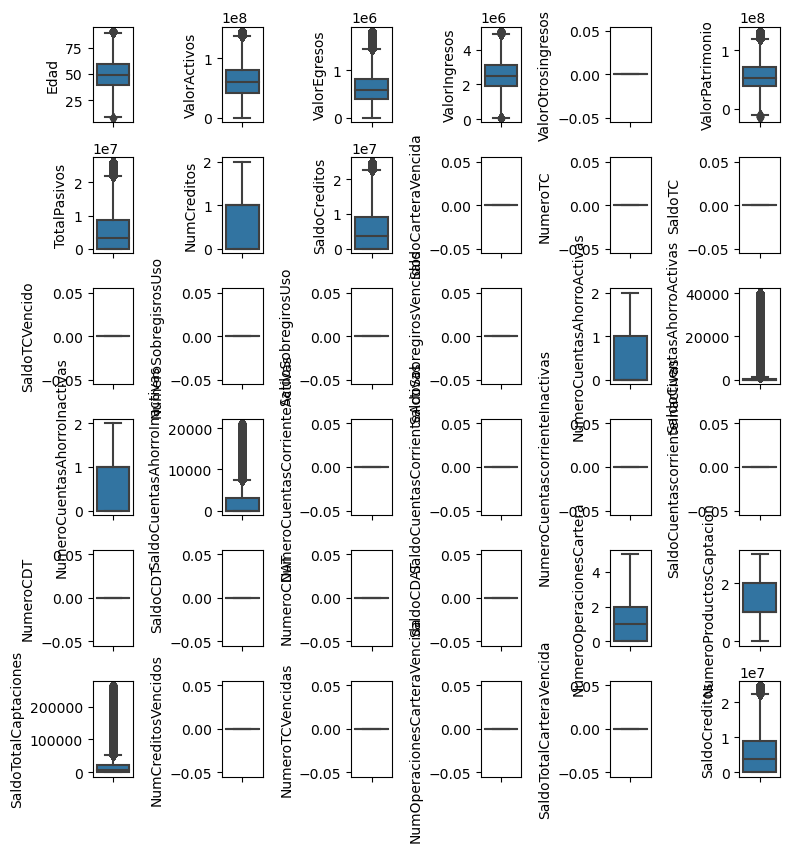

In [16]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 8))

subplot(6,6,1)
sns.boxplot(y = datos_clean['Edad']) 

subplot(6,6,2)
sns.boxplot(y = datos_clean['ValorActivos'])

subplot(6,6,3)
sns.boxplot(y = datos_clean['ValorEgresos'])

subplot(6,6,4)
sns.boxplot(y = datos_clean['ValorIngresos'])

subplot(6,6,5)
sns.boxplot(y = datos_clean['ValorOtrosingresos'])

subplot(6,6,6)
sns.boxplot(y = datos_clean['ValorPatrimonio'])

subplot(6,6,7)
sns.boxplot(y = datos_clean['TotalPasivos'])

subplot(6,6,8)
sns.boxplot(y = datos_clean['NumCreditos'])

subplot(6,6,9)
sns.boxplot(y = datos_clean['SaldoCreditos'])

subplot(6,6,10)
sns.boxplot(y = datos_clean['SaldoCarteraVencida']) 

subplot(6,6,11)
sns.boxplot(y = datos_clean['NumeroTC']) 

subplot(6,6,12)
sns.boxplot(y = datos_clean['SaldoTC']) 

subplot(6,6,13)
sns.boxplot(y = datos_clean['SaldoTCVencido']) 

subplot(6,6,14)
sns.boxplot(y = datos_clean['NumeroSobregisrosUso']) 

subplot(6,6,15)
sns.boxplot(y = datos_clean['SaldoSobregirosUso']) 

subplot(6,6,16)
sns.boxplot(y = datos_clean['SaldoSobregirosVencidos']) 

subplot(6,6,17)
sns.boxplot(y = datos_clean['NumeroCuentasAhorroActivas']) 

subplot(6,6,18)
sns.boxplot(y = datos_clean['SaldoCuentasAhorroActivas']) 

subplot(6,6,19)
sns.boxplot(y = datos_clean['NumeroCuentasAhorroInactivas']) 

subplot(6,6,20)
sns.boxplot(y = datos_clean['SaldoCuentasAhorroInactivas']) 

subplot(6,6,21)
sns.boxplot(y = datos_clean['NumeroCuentasCorrienteActivas']) 

subplot(6,6,22)
sns.boxplot(y = datos_clean['SaldoCuentasCorrienteActivas']) 

subplot(6,6,23)
sns.boxplot(y = datos_clean['NumeroCuentascorrienteInactivas']) 

subplot(6,6,24)
sns.boxplot(y = datos_clean['SaldoCuentascorrienteInactivas']) 

subplot(6,6,25)
sns.boxplot(y = datos_clean['NumeroCDT']) 

subplot(6,6,26)
sns.boxplot(y = datos_clean['SaldoCDT']) 

subplot(6,6,27)
sns.boxplot(y = datos_clean['NumeroCDAT']) 

subplot(6,6,28)
sns.boxplot(y = datos_clean['SaldoCDAT']) 

subplot(6,6,29)
sns.boxplot(y = datos_clean['NumeroOperacionesCartera'])

subplot(6,6,30)
sns.boxplot(y = datos_clean['NumeroProductosCaptacion'])

subplot(6,6,31)
sns.boxplot(y = datos_clean['SaldoTotalCaptaciones'])

subplot(6,6,32)
sns.boxplot(y = datos_clean['NumCreditosVencidos'])

subplot(6,6,33)
sns.boxplot(y = datos_clean['NumeroTCVencidas'])

subplot(6,6,34)
sns.boxplot(y = datos_clean['NumOperacionesCarteraVencida'])

subplot(6,6,35)
sns.boxplot(y = datos_clean['SaldoTotalCarteraVencida'])

subplot(6,6,36)
sns.boxplot(y = datos_clean['SaldoCreditos'])

plt.tight_layout() 
plt.draw()

In [17]:
datos_clean_1=datos_clean.drop(['ValorOtrosingresos','SaldoCarteraVencida','NumeroTC','SaldoTC','SaldoTCVencido','NumeroSobregisrosUso','SaldoSobregirosUso','SaldoSobregirosVencidos','NumeroCuentasCorrienteActivas','SaldoCuentasCorrienteActivas','NumeroCuentascorrienteInactivas','SaldoCuentascorrienteInactivas','NumeroCDT','SaldoCDT','NumeroCDAT','SaldoCDAT','NumCreditosVencidos','NumeroTCVencidas','NumOperacionesCarteraVencida','SaldoTotalCarteraVencida'],axis=1)


In [18]:
datos_clean_1.describe()

,Edad,ValorActivos,ValorEgresos,ValorIngresos,ValorPatrimonio,TotalPasivos,NumCreditos,SaldoCreditos,NumeroCuentasAhorroActivas,SaldoCuentasAhorroActivas,NumeroCuentasAhorroInactivas,SaldoCuentasAhorroInactivas,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones
count,487770.000000,4.506870e+05,4.366420e+05,4.515450e+05,4.528390e+05,4.515270e+05,463999.000000,4.645140e+05,488507.000000,382706.000000,483582.000000,417682.000000,4.637460e+05,487770.000000,485878.000000,391017.000000
mean,49.337436,6.100551e+07,6.597405e+05,2.454248e+06,5.493766e+07,5.370752e+06,0.840312,5.471603e+06,0.487960,2229.338676,0.641248,2471.230197,5.600288e+06,1.096000,1.226223,23689.821314
std,13.949111,2.749686e+07,3.409692e+05,9.070953e+05,2.502722e+07,6.135715e+06,0.706192,6.052491e+06,0.553041,5927.390677,0.656679,4606.671541,6.112859e+06,1.009269,0.651758,44160.458186
min,8.000000,0.000000e+00,0.000000e+00,7.500000e+04,-1.600000e+07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,4.200000e+07,4.000000e+05,1.900000e+06,3.800000e+07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,422.000000
50%,49.000000,6.000000e+07,5.900000e+05,2.500000e+06,5.283700e+07,3.276000e+06,1.000000,3.749664e+06,0.000000,0.000000,1.000000,0.000000,3.937306e+06,1.000000,1.000000,5957.000000
75%,59.000000,8.000000e+07,8.200000e+05,3.100000e+06,7.050000e+07,8.737012e+06,1.000000,9.000000e+06,1.000000,405.000000,1.000000,2937.000000,9.313633e+06,2.000000,2.000000,21102.000000
max,91.000000,1.460300e+08,1.832500e+06,5.075000e+06,1.326700e+08,2.625000e+07,2.000000,2.500000e+07,2.000000,40309.000000,2.000000,21199.580000,2.526130e+07,5.000000,3.000000,266183.000000


In [19]:
datos_clean_1.isnull().sum()

SegmentoDesc                         0
NumeroDoctoIdentificacion            0
TipoDoctoIdentificacionCD            0
SexoDesc                             0
Edad                              1035
EstadoCivilDesc                      0
ProfesionDesc                        0
ClienteFallecido                     0
indClienteEsEmpleado                 0
TipoClienteDesc                      0
ValorActivos                     38118
ValorEgresos                     52163
ValorIngresos                    37260
ValorPatrimonio                  35966
TotalPasivos                     37278
NumCreditos                      24806
SaldoCreditos                    24291
NumeroCuentasAhorroActivas         298
SaldoCuentasAhorroActivas       106099
NumeroCuentasAhorroInactivas      5223
SaldoCuentasAhorroInactivas      71123
SaldoTotalCartera                25059
NumeroOperacionesCartera          1035
NumeroProductosCaptacion          2927
SaldoTotalCaptaciones            97788
dtype: int64

<AxesSubplot:>

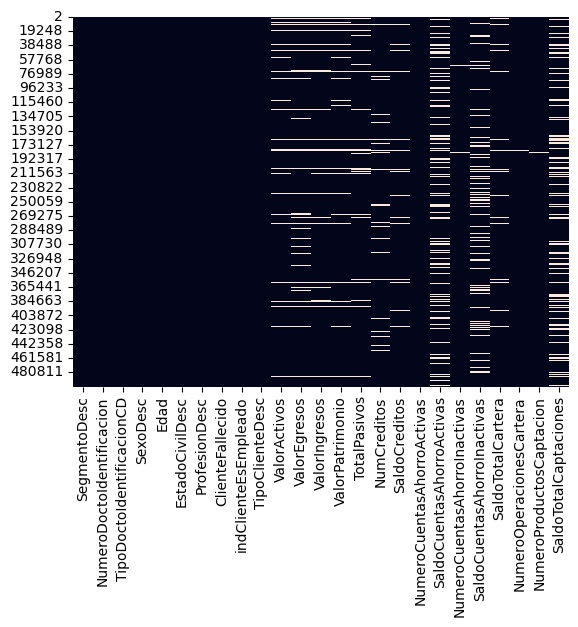

In [20]:
sns.heatmap(datos_clean_1.isnull(), cbar=False)

In [21]:
datos_clean_2=datos_clean_1.dropna()

In [22]:
datos_clean_2.describe()

,Edad,ValorActivos,ValorEgresos,ValorIngresos,ValorPatrimonio,TotalPasivos,NumCreditos,SaldoCreditos,NumeroCuentasAhorroActivas,SaldoCuentasAhorroActivas,NumeroCuentasAhorroInactivas,SaldoCuentasAhorroInactivas,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones
count,253590.000000,2.535900e+05,2.535900e+05,2.535900e+05,2.535900e+05,2.535900e+05,253590.000000,2.535900e+05,253590.000000,253590.000000,253590.000000,253590.000000,2.535900e+05,253590.000000,253590.000000,253590.000000
mean,46.713447,5.805450e+07,6.431364e+05,2.422373e+06,5.284091e+07,5.225474e+06,0.943353,5.478594e+06,0.356536,2483.490335,0.681667,3072.326009,5.623038e+06,1.075389,1.054466,6057.917463
std,13.541782,2.356249e+07,3.229569e+05,7.813703e+05,2.216286e+07,5.591248e+06,0.663937,5.339980e+06,0.514471,6190.903025,0.626941,4866.718209,5.420621e+06,0.800551,0.608677,10495.926664
min,8.000000,0.000000e+00,0.000000e+00,7.800000e+04,-1.600000e+07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,36.000000,4.200000e+07,4.000000e+05,1.900000e+06,3.780000e+07,4.300000e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.357598e+05,1.000000,1.000000,1.000000
50%,46.000000,5.600000e+07,5.650000e+05,2.500000e+06,5.058700e+07,3.698000e+06,1.000000,4.391170e+06,0.000000,0.000000,1.000000,15.000000,4.500000e+06,1.000000,1.000000,2963.600000
75%,57.000000,7.300000e+07,8.000000e+05,3.000000e+06,6.700000e+07,8.138000e+06,1.000000,8.672719e+06,1.000000,907.580000,1.000000,4951.000000,8.977046e+06,2.000000,1.000000,8703.525000
max,91.000000,1.460000e+08,1.832458e+06,5.075000e+06,1.326400e+08,2.625000e+07,2.000000,2.500000e+07,2.000000,40307.000000,2.000000,21199.000000,2.525193e+07,5.000000,3.000000,265000.000000


In [23]:
print('Cantidad de Filas y columnas:',datos_clean_2.shape)

Cantidad de Filas y columnas: (253590, 25)


In [24]:
#datos_clean_2.to_csv('/Users/jaangulor/Library/CloudStorage/OneDrive-UniversidaddelosAndes/Ciencia de datos aplicada/Proyecto Final/Proyecto - Ciencia de datos/Bases de datos/datos_clean.csv',index=False,sep=';')

/Users/jaangulor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


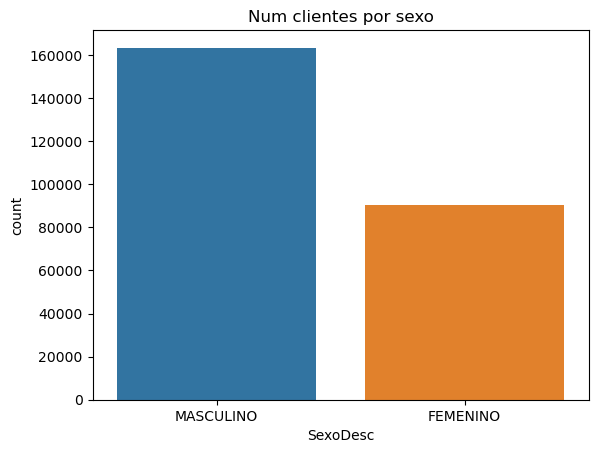

In [25]:
title = 'Num clientes por sexo'
sns.countplot(datos_clean_2['SexoDesc'])
plt.title(title)
plt.ioff()
plt.show()

/Users/jaangulor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


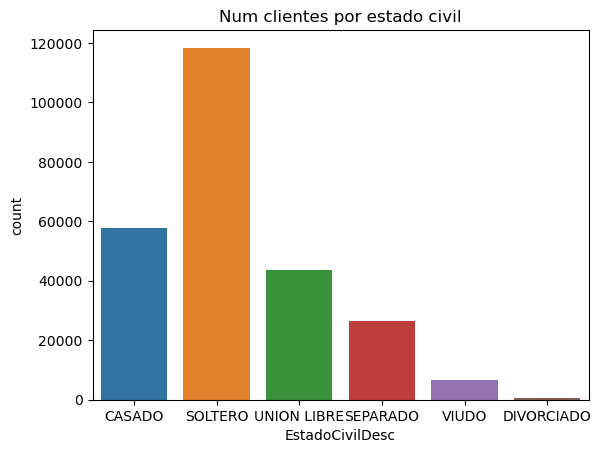

In [26]:
title = 'Num clientes por estado civil'
sns.countplot(datos_clean_2['EstadoCivilDesc'])
plt.title(title)
plt.ioff()
plt.show()

/Users/jaangulor/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


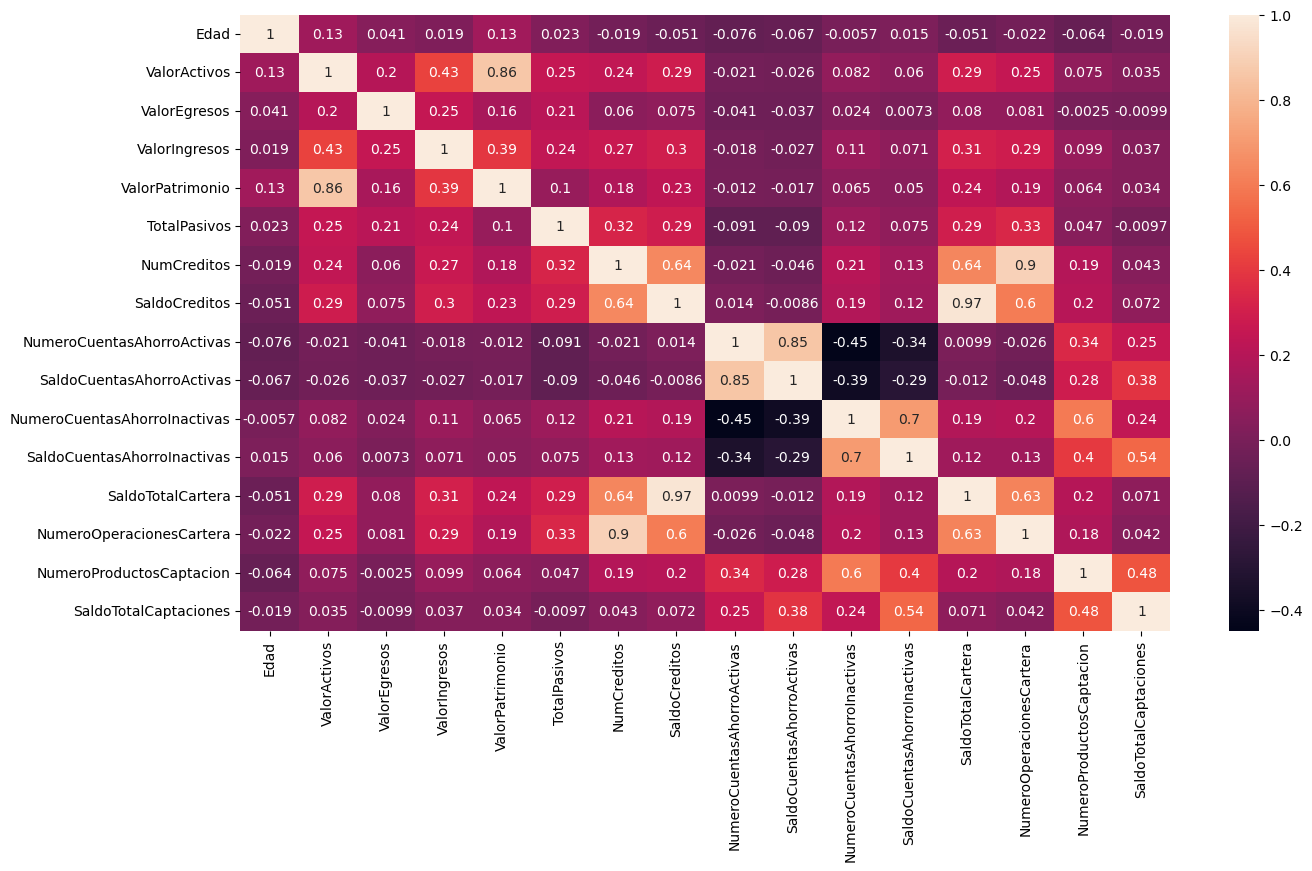

In [27]:
corr = datos_clean_2.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
datos_clean_2.columns

plt.show()